In [20]:
import requests
import json

API_KEY = '172b2b28664a482e92dd3ca48068ede1'  
ENDPOINT = 'https://newsapi.org/v2/top-headlines'
sources = ['cnn', 'bbc-news', 'al-jazeera-english', 'the-times-of-india', 'the-sydney-morning-herald', 'fox-news', 'msnbc']
source_headlines = {}

for source in sources:
    params = {
        'apiKey': API_KEY,
        'sources': source,
        'pageSize': 100
    }
    response = requests.get(ENDPOINT, params=params)
    data = response.json()
    source_headlines[source] = [article['title'] for article in data['articles']]

with open('source_headlines.json', 'w') as file:
    json.dump(source_headlines, file)

with open('source_headlines.json', 'r') as file:
    source_headlines = json.load(file)


In [2]:
import requests
import json

with open('source_headlines.json', 'r') as file:
    data = json.load(file)

regions = {
    'International': ['cnn', 'bbc-news', 'al-jazeera-english'],
    'South Asia': ['the-times-of-india'],
    'Australia': ['the-sydney-morning-herald']
}

political_leaning = {
    'Left-leaning': ['msnbc'],
    'Right-leaning': ['fox-news'],
    'Neutral': ['cnn', 'bbc-news', 'al-jazeera-english', 'the-times-of-india', 'the-sydney-morning-herald']
}

In [29]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...


True

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

with open('source_headlines.json', 'r') as file:
    source_headlines = json.load(file)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(tokens)

]for source, headlines in source_headlines.items():
    source_headlines[source] = [preprocess_text(headline) for headline in headlines]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
topics = {
    'Conflict': ['ukraine', 'russia', 'war', 'nato', 'conflict', 'military', 'defense'],
    'Environment': ['climate', 'global warming', 'carbon', 'emissions', 'environment', 'flood', 'rain'],
    'Health': ['covid', 'coronavirus', 'vaccine', 'pandemic', 'health', 'disease'],
    'Politics': ['election', 'president', 'government', 'political', 'vote', 'campaign'],
    'Economy': ['economy', 'trade', 'business', 'stock', 'market', 'deal', 'finance'],
    'Entertainment': ['music', 'film', 'movie', 'celebrity', 'show', 'tv', 'entertainment'],
    'Technology': ['tech', 'ai', 'technology', 'software', 'app', 'device', 'gadget'],
    'Sports': ['game', 'match', 'team', 'player', 'sport', 'tournament', 'league']
}

topic_headlines = {topic: [] for topic in topics}

for topic, keywords in topics.items():
    for source, headlines in source_headlines.items():
        for headline in headlines:
            if any(keyword in headline for keyword in keywords):
                topic_headlines[topic].append(headline)

In [8]:
from textblob import TextBlob

source_sentiments = {}

for source, headlines in source_headlines.items():
    sentiments = [TextBlob(headline).sentiment.polarity for headline in headlines]
    source_sentiments[source] = sentiments

C:\Northeastern\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Northeastern\Anaconda\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values


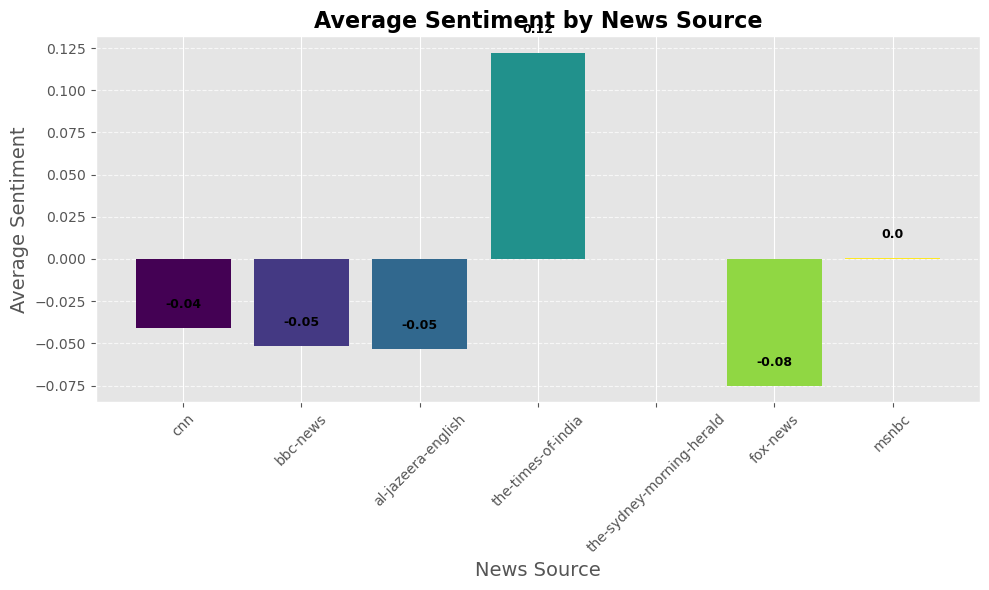

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

avg_sentiments = {source: np.mean(sentiments) for source, sentiments in source_sentiments.items()}
colors = plt.cm.viridis(np.linspace(0, 1, len(avg_sentiments)))

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(avg_sentiments.keys(), avg_sentiments.values(), color=colors)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_title('Average Sentiment by News Source', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Sentiment', fontsize=14)
ax.set_xlabel('News Source', fontsize=14)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

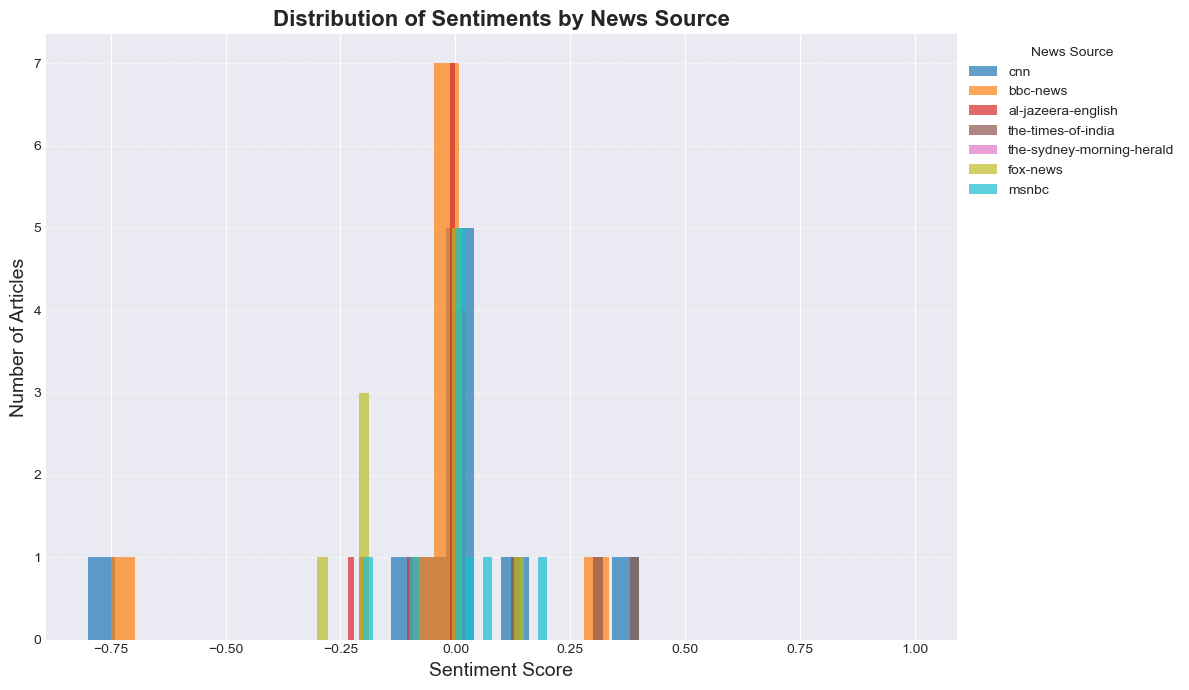

In [10]:
plt.style.use('seaborn-darkgrid')

colors = plt.cm.tab10(np.linspace(0, 1, len(source_sentiments)))

fig, ax = plt.subplots(figsize=(12, 7))

for i, (source, sentiments) in enumerate(source_sentiments.items()):
    ax.hist(sentiments, bins=20, alpha=0.7, label=source, color=colors[i])

ax.set_title('Distribution of Sentiments by News Source', fontsize=16, fontweight='bold')
ax.set_xlabel('Sentiment Score', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='News Source', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


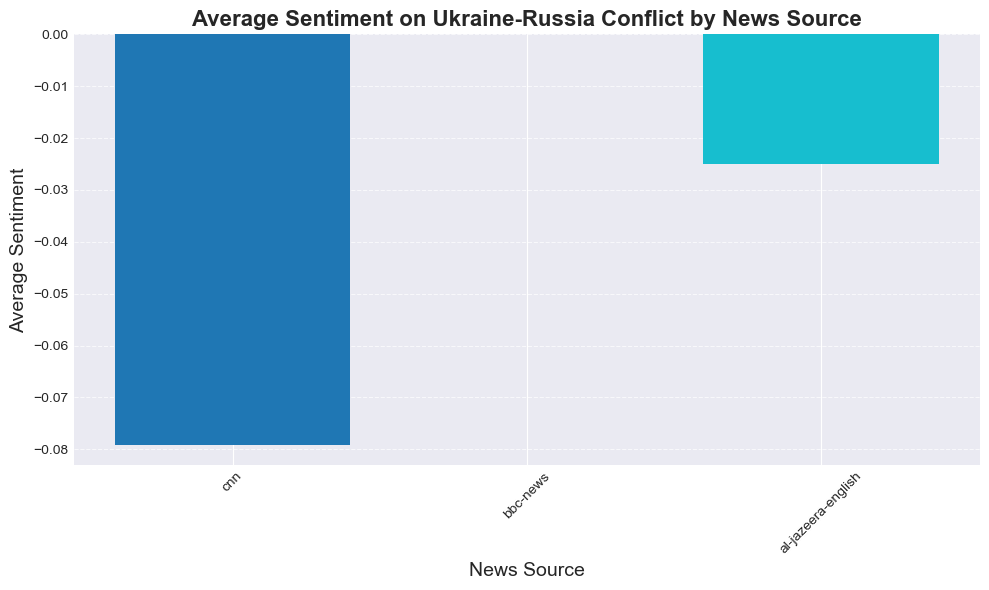

In [11]:
conflict_keywords = ['ukraine', 'russia', 'zelenskyy', 'nato', 'war']

conflict_sentiments = {}

for source, headlines in source_headlines.items():
    conflict_related_sentiments = [TextBlob(headline).sentiment.polarity for headline in headlines if any(keyword in headline for keyword in conflict_keywords)]
    if conflict_related_sentiments:
        conflict_sentiments[source] = sum(conflict_related_sentiments) / len(conflict_related_sentiments)

colors = plt.cm.tab10(np.linspace(0, 1, len(conflict_sentiments)))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(conflict_sentiments.keys(), conflict_sentiments.values(), color=colors)
ax.set_ylabel('Average Sentiment', fontsize=14)
ax.set_xlabel('News Source', fontsize=14)
ax.set_title('Average Sentiment on Ukraine-Russia Conflict by News Source', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


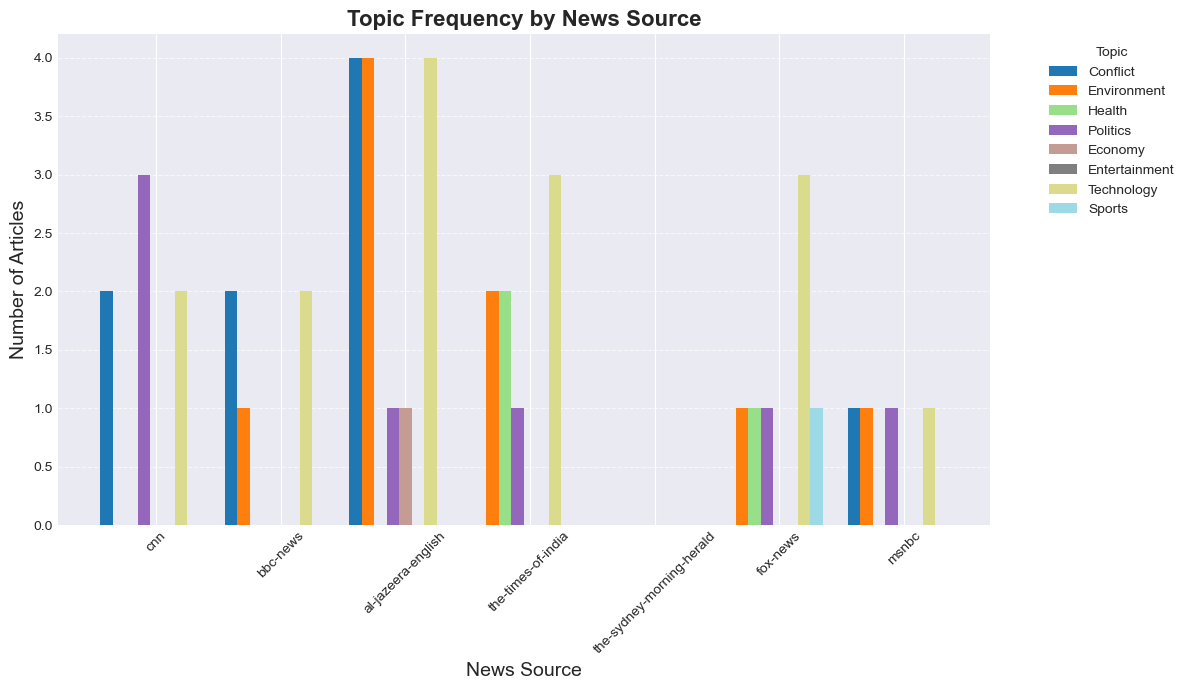

In [13]:
import numpy as np
import matplotlib.pyplot as plt

sources = ['cnn', 'bbc-news', 'al-jazeera-english', 'the-times-of-india', 'the-sydney-morning-herald', 'fox-news', 'msnbc']

topic_frequencies = {topic: {source: 0 for source in sources} for topic in topics}
for topic, keywords in topics.items():
    for source, headlines in source_headlines.items():
        count = sum(1 for headline in headlines if any(keyword in headline for keyword in keywords))
        topic_frequencies[topic][source] = count

colors = plt.cm.tab20(np.linspace(0, 1, len(topics)))

fig, ax = plt.subplots(figsize=(12, 7))
width = 0.1 
x = np.arange(len(source_headlines.keys()))

for i, (topic, frequencies) in enumerate(topic_frequencies.items()):
    ax.bar(x + i*width, frequencies.values(), width, label=topic, color=colors[i])

ax.set_ylabel('Number of Articles', fontsize=14)
ax.set_xlabel('News Source', fontsize=14)
ax.set_title('Topic Frequency by News Source', fontsize=16, fontweight='bold')
ax.set_xticks(x + width * (len(topics) / 2))
ax.set_xticklabels(source_headlines.keys(), rotation=45)
ax.legend(title='Topic', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

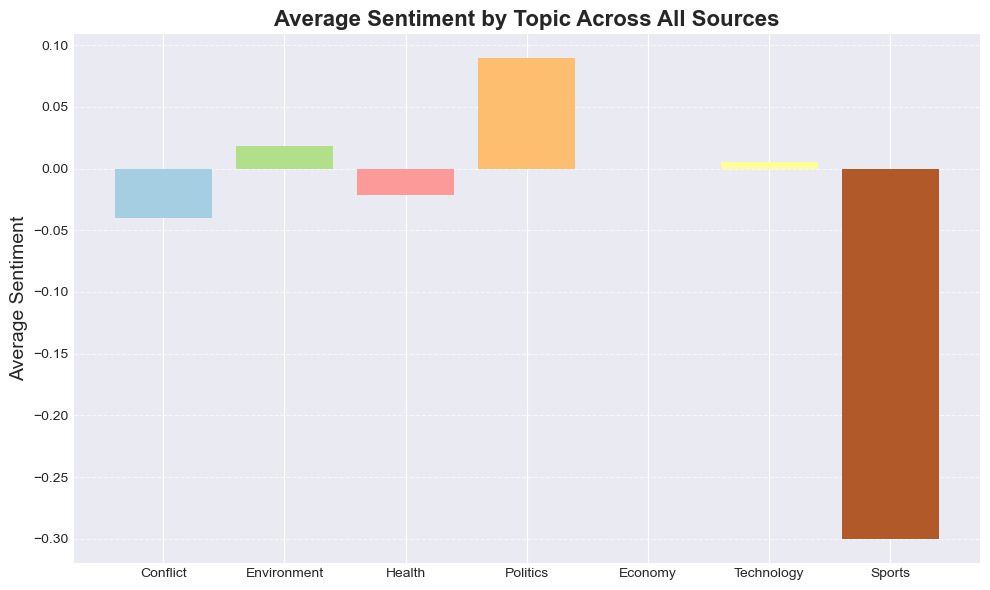

In [14]:
aggregate_topic_sentiments = {}

for topic, keywords in topics.items():
    all_headlines = [headline for source in source_headlines.values() for headline in source]
    topic_related_sentiments = [TextBlob(headline).sentiment.polarity for headline in all_headlines if any(keyword in headline for keyword in keywords)]
    if topic_related_sentiments:
        aggregate_topic_sentiments[topic] = sum(topic_related_sentiments) / len(topic_related_sentiments)

colors = plt.cm.Paired(np.linspace(0, 1, len(aggregate_topic_sentiments)))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(aggregate_topic_sentiments.keys(), aggregate_topic_sentiments.values(), color=colors)
ax.set_ylabel('Average Sentiment', fontsize=14)
ax.set_title('Average Sentiment by Topic Across All Sources', fontsize=16, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [15]:
headline_classifications = {source: {topic: 0 for topic in topics.keys()} for source in source_headlines.keys()}

for source, headlines in source_headlines.items():
    for headline in headlines:
        for topic, keywords in topics.items():
            if any(keyword in headline for keyword in keywords):
                headline_classifications[source][topic] += 1
                break 


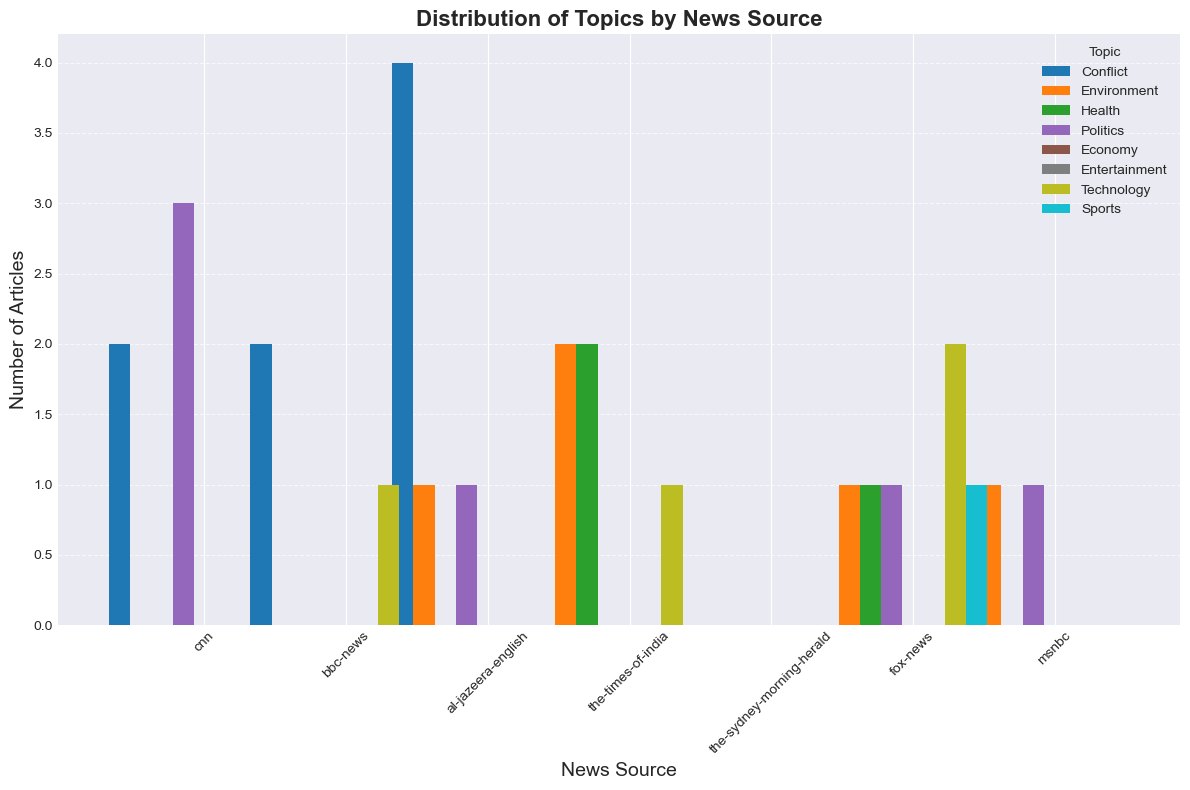

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.15  
x = np.arange(len(source_headlines.keys()))

color_map = plt.cm.tab10(np.linspace(0, 1, len(topics)))

for i, (topic, color) in enumerate(zip(topics.keys(), color_map)):
    topic_counts = [headline_classifications[source][topic] for source in source_headlines.keys()]
    ax.bar(x + i*width, topic_counts, width, label=topic, color=color)

ax.set_ylabel('Number of Articles', fontsize=14)
ax.set_xlabel('News Source', fontsize=14)
ax.set_title('Distribution of Topics by News Source', fontsize=16, fontweight='bold')
ax.set_xticks(x + width * (len(topics) / 2))
ax.set_xticklabels(source_headlines.keys(), rotation=45)
ax.legend(title='Topic', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [17]:
topic_sentiment = {source: {topic: [] for topic in topics.keys()} for source in source_headlines.keys()}

for source, headlines in source_headlines.items():
    for headline in headlines:
        for topic, keywords in topics.items():
            if any(keyword in headline for keyword in keywords):
                sentiment = TextBlob(headline).sentiment.polarity
                topic_sentiment[source][topic].append(sentiment)
                break

avg_topic_sentiment = {source: {topic: sum(sentiments)/len(sentiments) if sentiments else 0 for topic, sentiments in data.items()} for source, data in topic_sentiment.items()}

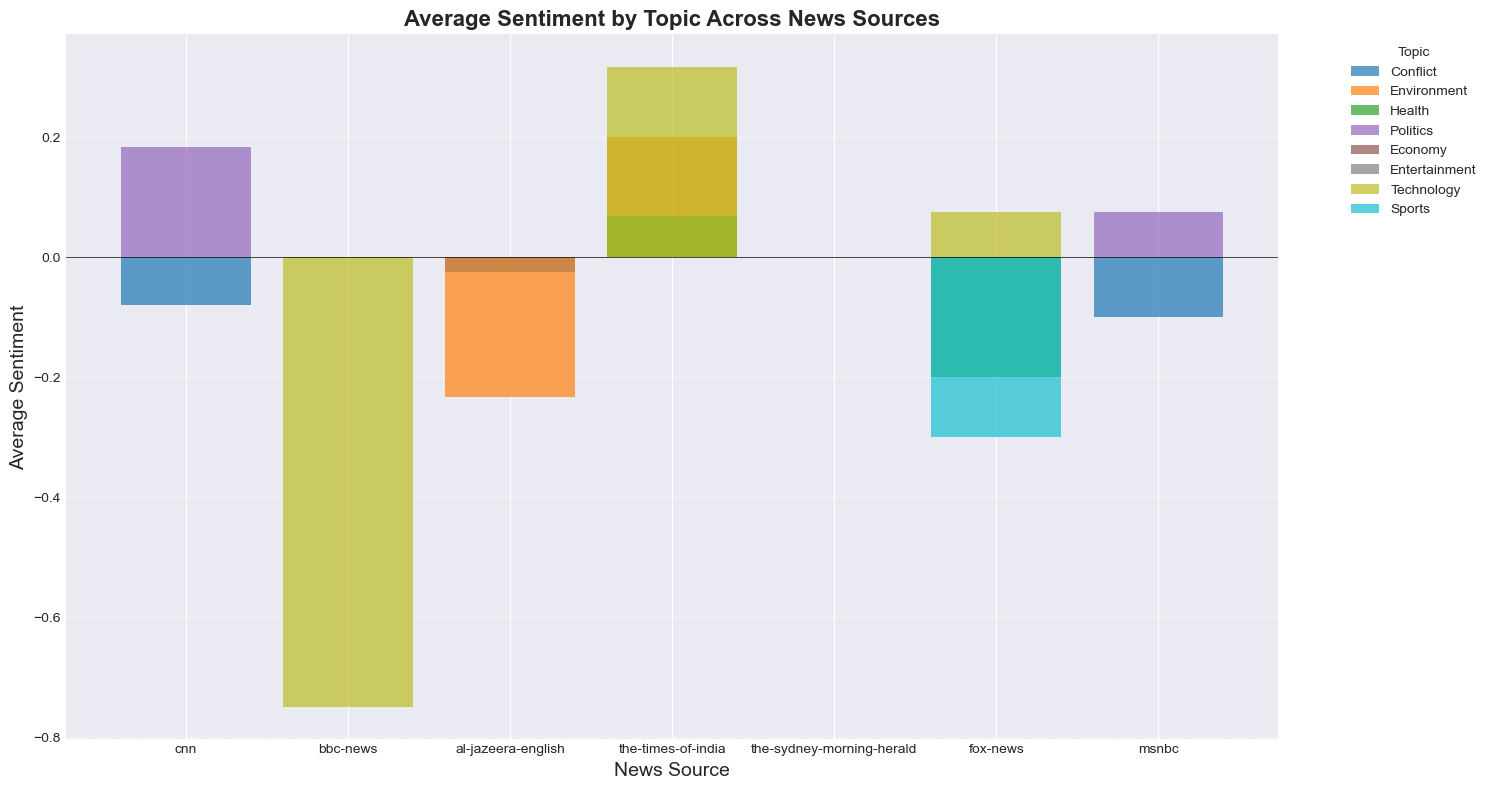

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))

for topic, color in zip(topics.keys(), color_map):
    sentiments = [avg_topic_sentiment[source][topic] for source in source_headlines.keys()]
    ax.bar(source_headlines.keys(), sentiments, label=topic, color=color, alpha=0.7)

ax.set_ylabel('Average Sentiment', fontsize=14)
ax.set_xlabel('News Source', fontsize=14)
ax.set_title('Average Sentiment by Topic Across News Sources', fontsize=16, fontweight='bold')
ax.legend(title='Topic', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.axhline(0, color='black',linewidth=0.5)

plt.tight_layout()
plt.show()

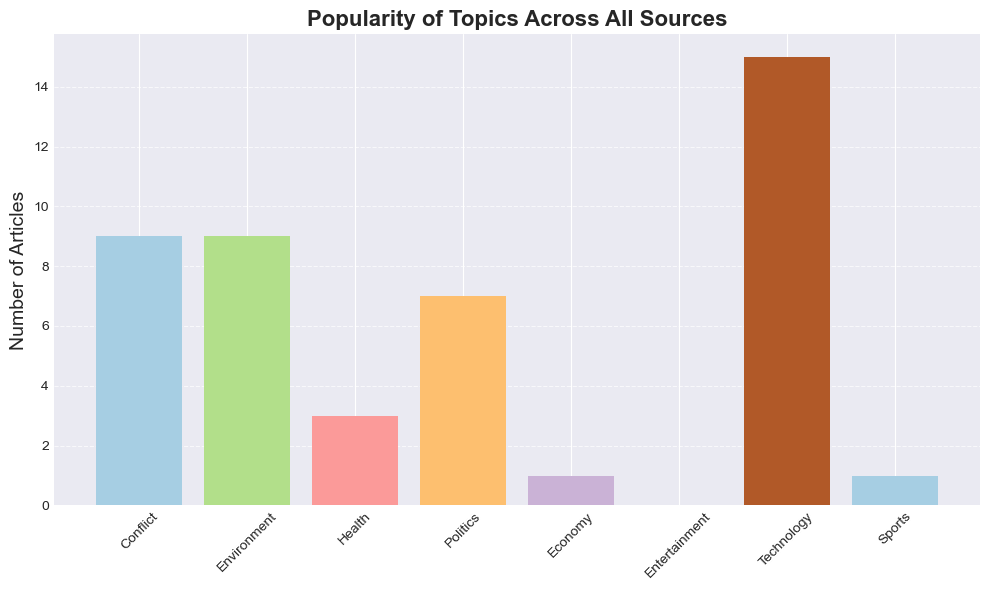

In [19]:
import numpy as np
import matplotlib.pyplot as plt


topic_counts = {topic: sum(frequencies.values()) for topic, frequencies in topic_frequencies.items()}

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(topic_counts.keys(), topic_counts.values(), color=colors)
ax.set_ylabel('Number of Articles', fontsize=14)
ax.set_title('Popularity of Topics Across All Sources', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [97]:
import requests

API_KEY = "GqCjb4eN0JVfLll0s_4SL5ZQ9liJQuSC261lw0EkhzvoJqwS"
ENDPOINT = "https://api.currentsapi.services/v1/latest-news"

headers = {
    "Authorization": API_KEY
}

response = requests.get(ENDPOINT, headers=headers)
data = response.json()

print(data['news'][0])


{'id': 'e4732307-e7e0-455c-80f9-cc22b7d7773b', 'title': 'Madison Keys surges back into view by reaching the U.S. Open quarterfinals', 'description': 'Listen 5 min Share Comment on this story Comment\n\nNEW YORK — The vast swell of Americans who remain in this Labor Day cookout turned U.S. Open is appropriately varied, as fans were reminded Monday. Th...', 'url': 'https://www.washingtonpost.com/sports/2023/09/04/madison-keys-us-open-quarterfinals/', 'author': 'Ava Wallace', 'image': 'https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/4YXSDCISHFFRVC2563FSJCIKHE_size-normalized.jpg&w=1440', 'language': 'en', 'category': ['sports'], 'published': '2023-09-05 00:31:00 +0000'}


In [41]:
import requests
import json

API_KEY = 'GqCjb4eN0JVfLll0s_4SL5ZQ9liJQuSC261lw0EkhzvoJqwS' 
ENDPOINT = 'https://api.currentsapi.services/v1/latest-news'

domains = [
    'cnn.com', 'bbc.co.uk', 'aljazeera.com', 'timesofindia.indiatimes.com', 
    'smh.com.au', 'foxnews.com', 'msnbc.com', 'nytimes.com', 'washingtonpost.com', 
    'theguardian.com'
]

domain_headlines = {}

for domain in domains:
    params = {
        'apiKey': API_KEY,
        'domain': domain,
        'pageSize': 100
    }
    response = requests.get(ENDPOINT, params=params)
    data = response.json()
    domain_headlines[domain] = [article['title'] for article in data['news']]

filename = 'domain_headlines.json'
with open(filename, 'w') as file:
    json.dump(domain_headlines, file)

with open(filename, 'r') as file:
    domain_headlines = json.load(file)

for domain, headlines in domain_headlines.items():
    print(f"Headlines from {domain}:")
    for headline in headlines:
        print(headline)
    print("\n")

Headlines from cnn.com:
How US-made Bradley Fighting Vehicles helped Ukraine win the battle for Robotyne | CNN
Boy rescued after spending the night clinging to a tree to escape deadly flooding in Spain | CNN
Greece floods kill at least one as country grapples with 'totally extreme weather phenomenon' | CNN
Peter Navarro, second ex-Trump aide to be prosecuted for contempt of Congress, faces trial Tuesday | CNN Politics
Helicopter pilot to receive Medal of Honor for daring rescue during Vietnam War | CNN Politics
Why even a popular bipartisan issue like firefighter pay may have trouble getting passed in Congress | CNN Politics
CNN Exclusive: Special counsel election probe continues with focus on fundraising, voting equipment breaches | CNN Politics
Rhode Island and Utah hold special election primaries for House seats | CNN Politics
'Dinner plate sized' device found inside woman's abdomen 18 months after cesarean birth | CNN
South Korean teachers hold mass protests after suicide highlight

In [21]:
import json

domains = [
    'cnn.com', 'bbc.co.uk', 'aljazeera.com', 'timesofindia.indiatimes.com', 
    'smh.com.au', 'foxnews.com', 'msnbc.com', 'nytimes.com', 'washingtonpost.com', 
    'theguardian.com'
]

filename = 'domain_headlines.json'
with open(filename, 'r') as file:
    domain_headlines = json.load(file)

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    processed_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words and token.isalpha()]
    return processed_tokens

sample_text = "The quick brown fox jumps over the lazy dog."
print(preprocess_text(sample_text))


['quick', 'brown', 'fox', 'jump', 'lazy', 'dog']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
import json
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import joblib

joblib.parallel_backend('threading')

filename = 'domain_headlines.json'
with open(filename, 'r') as file:
    domain_headlines = json.load(file)

articles = [article for sublist in domain_headlines.values() for article in sublist]

preprocessed_articles = [preprocess_text(article) for article in articles]

dictionary = corpora.Dictionary(preprocessed_articles)
corpus = [dictionary.doc2bow(text) for text in preprocessed_articles]

lda_model = LdaModel(corpus, num_topics=7, id2word=dictionary, passes=15)

vis_data = gensimvis.prepare(lda_model, corpus, dictionary, n_jobs=1)
pyLDAvis.display(vis_data)


In [26]:
from textblob import TextBlob

articles = [article for sublist in domain_headlines.values() for article in sublist]


sentiments = {'positive': 0, 'neutral': 0, 'negative': 0}

for article in articles:
    analysis = TextBlob(article)
    if analysis.sentiment.polarity > 0:
        sentiments['positive'] += 1
    elif analysis.sentiment.polarity == 0:
        sentiments['neutral'] += 1
    else:
        sentiments['negative'] += 1

print(sentiments)

{'positive': 94, 'neutral': 159, 'negative': 47}


C:\Northeastern\Anaconda\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Northeastern\Anaconda\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


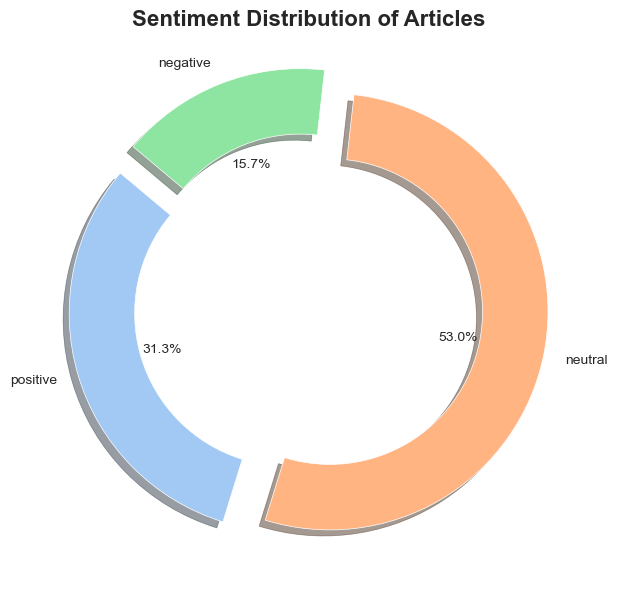

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("pastel")

labels = sentiments.keys()
sizes = sentiments.values()
colors = sns.color_palette("pastel", len(sentiments))
explode = (0.1, 0.1, 0.1) 

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops=dict(width=0.3))

plt.title('Sentiment Distribution of Articles', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


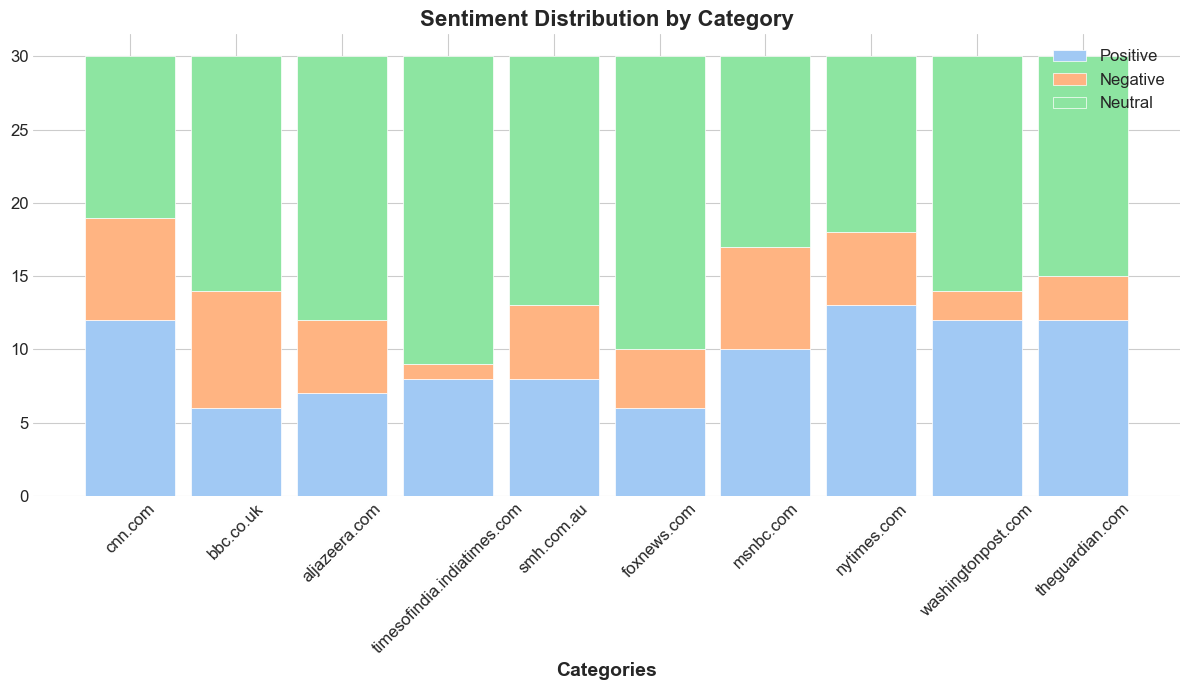

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("pastel")

sentiment_counts = {category: {'positive': 0, 'negative': 0, 'neutral': 0} for category in domain_headlines.keys()}

for category, headlines in domain_headlines.items():
    for headline in headlines:
        analysis = TextBlob(headline)
        if analysis.sentiment.polarity > 0:
            sentiment_counts[category]['positive'] += 1
        elif analysis.sentiment.polarity < 0:
            sentiment_counts[category]['negative'] += 1
        else:
            sentiment_counts[category]['neutral'] += 1

categories = list(sentiment_counts.keys())
positive_counts = [sentiment_counts[cat]['positive'] for cat in categories]
negative_counts = [sentiment_counts[cat]['negative'] for cat in categories]
neutral_counts = [sentiment_counts[cat]['neutral'] for cat in categories]

barWidth = 0.85
r = np.arange(len(categories))

plt.figure(figsize=(12, 7))

plt.bar(r, positive_counts, color=sns.color_palette()[0], edgecolor='white', width=barWidth, label='Positive')
plt.bar(r, negative_counts, bottom=positive_counts, color=sns.color_palette()[1], edgecolor='white', width=barWidth, label='Negative')
plt.bar(r, neutral_counts, bottom=[i+j for i,j in zip(positive_counts, negative_counts)], color=sns.color_palette()[2], edgecolor='white', width=barWidth, label='Neutral')

plt.xlabel('Categories', fontweight='bold', fontsize=14)
plt.xticks(r, categories, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.title('Sentiment Distribution by Category', fontweight='bold', fontsize=16)
plt.tight_layout()

plt.show()


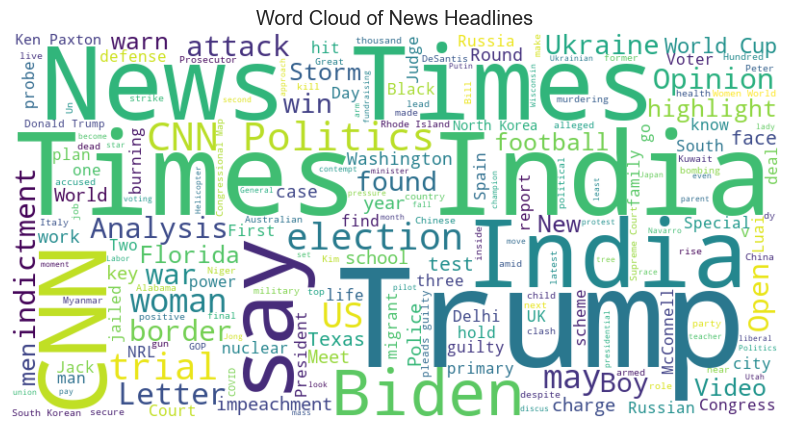

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Combine all headlines into a single text
all_headlines = ' '.join([headline for sublist in domain_headlines.values() for headline in sublist])

# Preprocess the text
tokens = preprocess_text(all_headlines)
cleaned_text = ' '.join(tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Headlines')
plt.show()


In [50]:
import requests
import json

ER_API_KEY = '89535373-8dee-4c9b-b4e4-0f6c2a22421e'
ER_ENDPOINT = 'https://eventregistry.org/api/v1/article/getArticles'

all_articles = []
articles_fetched = 0
page_size = 200
token_limit = 2000  

while articles_fetched < token_limit:
    er_params = {
        'apiKey': ER_API_KEY,
        'action': 'getArticles',
        'query': json.dumps({
            "$query": {
                "lang": "eng",
                "keyword": "news"
            }
        }),
        'articlesCount': page_size,
        'articlesStart': articles_fetched
    }

    er_response = requests.get(ER_ENDPOINT, params=er_params)
    er_data = er_response.json()

    if 'error' in er_data:
        print(f"Error: {er_data['error']}")
        break

    fetched_in_this_call = len(er_data['articles'])
    if fetched_in_this_call == 0:
        break

    all_articles.extend(er_data['articles'])
    articles_fetched += fetched_in_this_call


er_filename = 'eventregistry_articles_paginated.json'
with open(er_filename, 'w') as file:
    json.dump(all_articles, file)

print(f"Total number of articles fetched from EventRegistry: {len(all_articles)}")


Total number of articles fetched from EventRegistry: 2000
